In [2]:
import pandas as pd
import numpy as np
from ipywidgets import interact,IntSlider
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
data_train=r"C:\Users\josef\Downloads\DATASETS\Train_data.csv"
df_train=pd.read_csv(data_train)

In [4]:
dummy=pd.get_dummies(data=df_train,columns=["protocol_type","service","flag","class"],drop_first=True)
dummy

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class_normal
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,True
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
25188,0,334,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
25189,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
25190,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


In [5]:
input_X = dummy.drop(columns=['class_normal'])  # Eliminar la variable objetivo 'class' de las características
target_y = dummy['class_normal']
X_train, X_test, y_train, y_test = train_test_split(input_X, target_y, test_size = 0.2,
random_state = 30)
X_train.shape, X_test.shape

((20153, 115), (5039, 115))

In [6]:
from sklearn.naive_bayes import GaussianNB
modelNB=GaussianNB()

In [7]:
modelNB.fit(X_train,y_train)

GaussianNB()

In [8]:
modelNB.score(X_test,y_test)

0.5550704504862076

In [9]:
modelNB.predict(X_test[:20])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True])

In [10]:
modelNB.predict_proba(X_test[:10])

array([[2.60132580e-01, 7.39867420e-01],
       [1.62315158e-04, 9.99837685e-01],
       [3.55997471e-01, 6.44002529e-01],
       [6.39716178e-04, 9.99360284e-01],
       [4.97681301e-03, 9.95023187e-01],
       [2.65463326e-02, 9.73453667e-01],
       [5.24930137e-02, 9.47506986e-01],
       [3.57106714e-01, 6.42893286e-01],
       [1.47189441e-04, 9.99852811e-01],
       [9.95755927e-01, 4.24407305e-03]])

In [11]:
y_pred=modelNB.predict(X_test)
y_pred

array([ True,  True,  True, ..., False,  True, False])

In [12]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[ 183, 2181],
       [  61, 2614]], dtype=int64)

Text(95.72222222222221, 0.5, 'Verdadero')

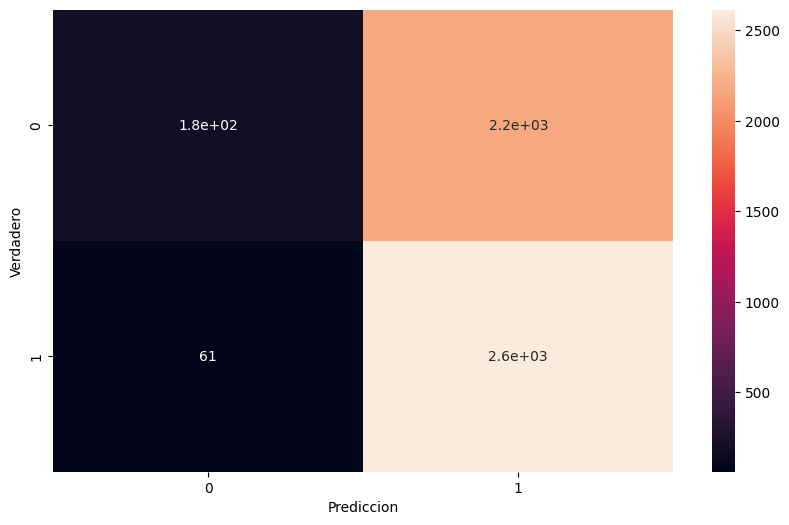

In [13]:
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')